In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models import LSTM_Model
from train import Train

from utils import fisher_distance
from data_utils import create_loaders, simulate_data, train_and_get_distance

/home/ahmed/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_window = 36
horizon = 12

input_dimension = 1
hidden_dimension = 40
batch_size = 256

device = 'cpu'

number_of_dataset = 10
merged_data = simulate_data(dataset_number = number_of_dataset, weekend_gain = 1.2, number_of_weeks = 1)

In [3]:
distance_list_first_dataset, distance_list_first_dataset_loss = train_and_get_distance(merged_data, 0, train_window, horizon, batch_size, input_dimension, hidden_dimension, num_epochs=30, verbose=True, verbose_every=10)
distance_list_sixth_dataset, distance_list_sixth_dataset_loss = train_and_get_distance(merged_data, 5, train_window, horizon, batch_size, input_dimension, hidden_dimension, num_epochs=30, verbose=True, verbose_every=10)

-----starting training-----
epoch 10 train loss 0.64637 ------ validation loss 0.64929
epoch 20 train loss 0.43538 ------ validation loss 0.45418
epoch 30 train loss 0.14094 ------ validation loss 0.19380
-----starting training-----
epoch 10 train loss 0.81452 ------ validation loss 0.65582
epoch 20 train loss 0.69421 ------ validation loss 0.69447
epoch 30 train loss 0.55611 ------ validation loss 0.52313


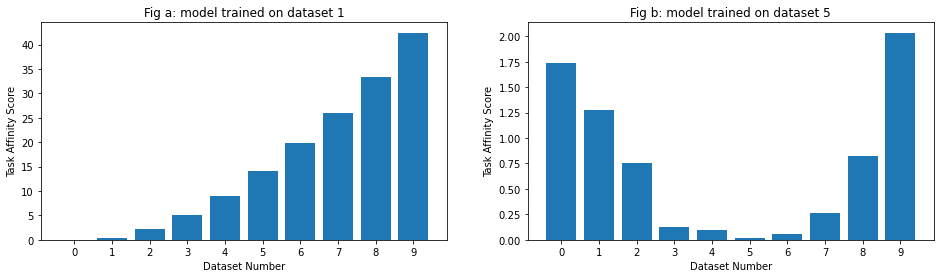

In [4]:
fig, axes = plt.subplots(1, 2,  figsize=(16, 4))

axes[0].bar(range(number_of_dataset), distance_list_first_dataset)
axes[0].set_xlabel('Dataset Number')
axes[0].set_ylabel('Task Affinity Score')
axes[0].set_title('Fig a: model trained on dataset 1')
axes[0].set_xticks(range(number_of_dataset))


axes[1].bar(range(number_of_dataset), distance_list_sixth_dataset)
axes[1].set_xlabel('Dataset Number')
axes[1].set_ylabel('Task Affinity Score')
axes[1].set_title('Fig b: model trained on dataset 5')
axes[1].set_xticks(range(number_of_dataset))

plt.show()

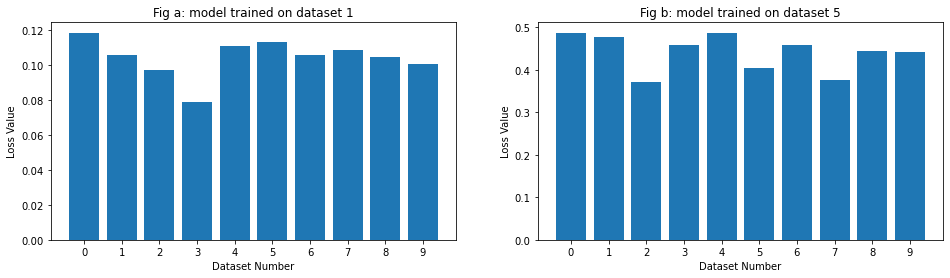

In [5]:
fig, axes = plt.subplots(1, 2,  figsize=(16, 4))

axes[0].bar(range(number_of_dataset), distance_list_first_dataset_loss)
axes[0].set_xlabel('Dataset Number')
axes[0].set_ylabel('Loss Value')
axes[0].set_title('Fig a: model trained on dataset 1')
axes[0].set_xticks(range(number_of_dataset))


axes[1].bar(range(number_of_dataset), distance_list_sixth_dataset_loss)
axes[1].set_xlabel('Dataset Number')
axes[1].set_ylabel('Loss Value')
axes[1].set_title('Fig b: model trained on dataset 5')
axes[1].set_xticks(range(number_of_dataset))

plt.show()